In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import pathlib
from lb2jpsil import classifier_utils

In [2]:
import matplotlib

font = {'size'   : 14}

#matplotlib.rc('font', **font)

In [3]:
## Self explanatory
save_plots = True

## Toggle plot grid
show_grid = False

In [4]:
## Create plots directory, if missing
repo_dir = str(pathlib.Path.home()) + '/physical-background-studies/'

plot_directory = (
    repo_dir + 'plots/'
    + 'invariant_mass_veto/'
)

pathlib.Path(plot_directory).mkdir(parents=True, exist_ok=True)

# Import MC data

In [5]:
## @todo: do the same thing by hand

In [6]:
path_to_hd5_files = str(pathlib.Path.home()) + '/data/'
input_lambda = path_to_hd5_files + 'LHCbMC_2016-2017-2018_MagUpDown_Lb2JPsiL_Ttracks_v12.h5'
input_b = path_to_hd5_files + 'LHCbMC_2016-2017-2018_MagUpDown_B2JPsiK_Ttracks_v6.h5'

In [7]:
def p_modulus(px, py, pz):
    return np.sqrt(px**2 + py**2 + pz**2)

def transverse_p_modulus(px, py):
    return np.sqrt(px**2 + py**2)

## $\Lambda_b^0 \rightarrow J/\psi \Lambda^0$

In [8]:
df_reco = pd.read_hdf(input_lambda, key='LHCbMC_Lb')
df_truth = pd.read_hdf(input_lambda, key='LHCbMCTruth_Lb')
df_lambdab = pd.merge(df_truth.loc[df_truth['Rec_key'] >= 0], df_reco, left_index=True, right_on='MC_key')
df_lambdab = df_lambdab.loc[(df_lambdab['MC_key'] >= 0) & (df_lambdab['Rec_key'] >= 0)]

df_lambdab['TrackType'] = 'T'

del(df_reco, df_truth)

In [9]:
classifier_utils.calculate_derived_variables(df_lambdab)
df_lambdab = df_lambdab.loc[
    classifier_utils.generate_prefilter(df_lambdab, exclude=['DTF_FixJPsiLambda_PIDSubs_Lb_M']),
    :
].copy()

/home/adegenna/apollo/lib64/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
df_lambdab

,MCTRUTH_Lb_ENDVERTEX_X,MCTRUTH_Lb_ENDVERTEX_Y,MCTRUTH_Lb_ENDVERTEX_Z,MCTRUTH_L_ENDVERTEX_X,MCTRUTH_L_ENDVERTEX_Y,MCTRUTH_L_ENDVERTEX_Z,MCTRUTH_p_PX,MCTRUTH_p_PY,MCTRUTH_p_PZ,MCTRUTH_pim_PX,...,L_Pt,Lb_P,Lb_Pt,Lb_AM,L_AM,Jpsi_ADMASS,Lb_ABSBPVDIRA,L_ABSBPVDIRA,DTF_FixJPsiLambda_converged,DTF_FixJPsi_converged
Rec_key,,,,,,,,,,,,,,,,,,,,,
1,0.8237,-0.2123,3.514200,140.238602,325.837311,7463.102539,367.250000,1035.959961,24602.169922,174.279999,...,1230.995605,111346.117188,1121.861816,5492.368863,1135.929195,4.656479,0.999980,0.999999,True,True
14,0.9904,-0.2075,-9.769600,224.561996,56.081600,5921.048828,2894.560059,699.140015,74302.851562,293.929993,...,3692.165039,131979.562500,3527.530518,5820.192773,1295.477850,11.355209,0.999992,1.000000,True,True
17,0.8236,-0.2738,28.986401,-296.374695,-100.123802,5963.561523,-1268.760010,-522.340027,25478.310547,-184.460007,...,1432.606445,128919.835938,2970.159668,5559.350201,1486.463098,8.811295,0.999997,0.999991,True,True
22,0.7534,-0.2931,-1.211400,-38.645302,-105.471802,7776.826172,-649.429993,-1605.150024,113660.250000,-26.830000,...,1320.509277,226062.250000,5157.786621,5139.534159,1148.480995,4.813217,0.999994,1.000000,True,True
25,1.4204,0.1756,6.183100,113.135696,223.900299,7097.245117,1002.729980,2151.709961,69297.921875,246.179993,...,3665.838135,165198.500000,5480.286133,6129.754035,1253.333734,27.358871,0.999997,0.999999,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366319,0.5569,0.0628,57.432899,120.215797,-371.462097,7690.597168,355.570007,-1350.780029,26500.039062,109.430000,...,1047.205444,78991.656250,2090.365234,5171.156653,1105.151389,31.787338,0.999999,0.999997,True,True
366327,0.1985,-0.1576,-19.471500,-207.092300,-37.506302,6777.450195,-2266.669922,-458.640015,76301.921875,-294.079987,...,3390.741455,149233.578125,6984.786133,5995.053378,1154.687818,16.235367,0.999999,0.999997,True,True
366331,0.8633,0.1466,-68.771400,-63.068901,-245.641098,6745.173828,-477.579987,-2102.550049,59762.968750,-199.369995,...,3307.712158,123697.367188,5610.091309,6032.292586,1327.193591,6.057602,0.998967,1.000000,True,True


## $B^0 \rightarrow J/\psi K_S^0$

In [11]:
df_reco = pd.read_hdf(input_b, key='LHCbMC_B0')
df_truth = pd.read_hdf(input_b, key='LHCbMCTruth_B0')
df_b = pd.merge(df_truth.loc[df_truth['Rec_key'] >= 0], df_reco, left_index=True, right_on='MC_key')
df_b = df_b.loc[(df_b['MC_key'] >= 0) & (df_b['Rec_key'] >= 0)]

df_b['TrackType'] = 'T'

del(df_reco, df_truth)

In [12]:
classifier_utils.calculate_derived_variables_B0(df_b)
df_b = df_b.loc[
    classifier_utils.generate_prefilter(df_b, prefilters='B0_PIDSubTemplate'),
    :
].copy()

/home/adegenna/apollo/lib64/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Overview of invariant mass distributions

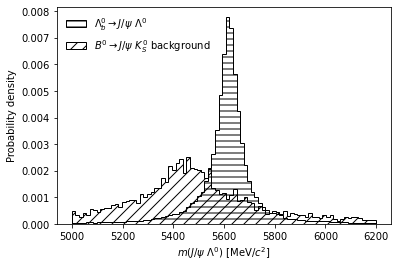

In [13]:
filename = 'phys_bkg_lambdab_comparison'

hist_params = {
    'density': True,
    'bins': 85,
    'edgecolor': 'black',
    'histtype': 'stepfilled',
    'range': (5000,6200),
}

lambda_params = {
    'hatch': '--',
    'facecolor': 'none',
    'label': r'$\Lambda_b^0 \rightarrow J/\psi~\Lambda^0$'
}

b_params = {
    'hatch': '//',
    'facecolor': 'none',
    'label': r'$B^0 \rightarrow J/\psi~K^0_S$ background'
}

plt.hist(df_lambdab['DTF_FixJPsiLambda_Lb_M'], **hist_params, **lambda_params)
plt.hist(df_b['DTF_FixJPsiKaon_PIDSubs_B0_M'], **hist_params, **b_params)

plt.legend(frameon=False, loc='upper left')
plt.ylabel("Probability density")
plt.xlabel("$m(J/\psi~\Lambda^0)$ [MeV/$c^2$]")

if save_plots:
    plt.savefig(plot_directory + filename + '.pdf', bbox_inches='tight')

plt.show()

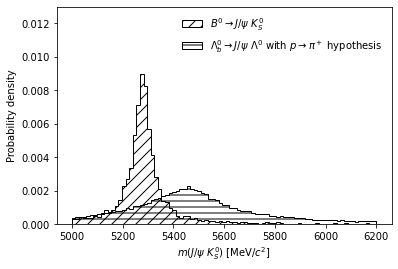

In [14]:
filename = 'phys_bkg_b0_comparison'

hist_params = {
    'density': True,
    'bins': 85,
    'edgecolor': 'black',
    'histtype': 'stepfilled',
    'range': (5000,6200),
}

lambda_params = {
    'hatch': '--',
    'facecolor': 'none',
    'label': r'$\Lambda_b^0 \rightarrow J/\psi~\Lambda^0$ with $p \rightarrow \pi^+$ hypothesis'
}

b_params = {
    'hatch': '//',
    'facecolor': 'none',
    'label': r'$B^0 \rightarrow J/\psi~K^0_S$'
}

plt.hist(df_b['DTF_FixJPsiKaon_B0_M'], **hist_params, **b_params)
plt.hist(df_lambdab['DTF_FixJPsiLambda_PIDSubs_Lb_M'], **hist_params, **lambda_params)

plt.legend(frameon=False, loc='upper right')
plt.ylabel("Probability density")
plt.xlabel("$m(J/\psi~K^0_S)$ [MeV/$c^2$]")
plt.ylim(0, 0.013)

if save_plots:
    plt.savefig(plot_directory + filename + '.pdf', bbox_inches='tight')

plt.show()

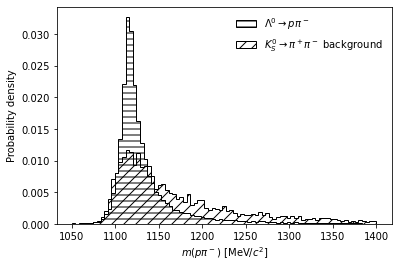

In [15]:
filename = 'phys_bkg_lambda_comparison'

hist_params = {
    'density': True,
    'bins': 85,
    'edgecolor': 'black',
    'histtype': 'stepfilled',
    'range': (1050,1400)
}

lambda_params = {
    'hatch': '--',
    'facecolor': 'none',
    'label': r'$\Lambda^0 \rightarrow p\pi^-$'
}

b_params = {
    'hatch': '//',
    'facecolor': 'none',
    'label': r'$K^0_S \rightarrow \pi^+\pi^-$ background'
}

plt.hist(df_lambdab['DTF_FixJPsi_L_M'], **hist_params, **lambda_params)
plt.hist(df_b['DTF_FixJPsi_PIDSubs_KS0_M'], **hist_params, **b_params)

plt.legend(frameon=False)
plt.ylabel("Probability density")
plt.xlabel("$m(p\pi^-)$ [MeV/$c^2$]")

if save_plots:
    plt.savefig(plot_directory + filename + '.pdf', bbox_inches='tight')

plt.show()

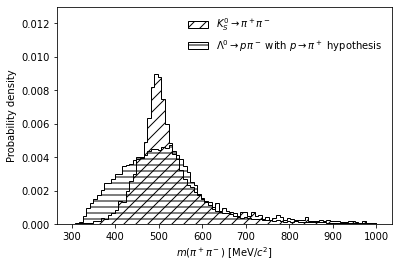

In [16]:
filename = 'phys_bkg_ks_comparison'

hist_params = {
    'density': True,
    'bins': 85,
    'edgecolor': 'black',
    'histtype': 'stepfilled',
    'range': (300,1000)
}

lambda_params = {
    'hatch': '--',
    'facecolor': 'none',
    'label': r'$\Lambda^0 \rightarrow p\pi^-$ with $p \rightarrow \pi^+$ hypothesis'
}

b_params = {
    'hatch': '//',
    'facecolor': 'none',
    'label': r'$K^0_S \rightarrow \pi^+\pi^-$'
}

plt.hist(df_b['DTF_FixJPsi_KS0_M'], **hist_params, **b_params)
plt.hist(df_lambdab['DTF_FixJPsi_PIDSubs_L_M'], **hist_params, **lambda_params)

plt.legend(frameon=False)
plt.ylabel("Probability density")
plt.xlabel("$m(\pi^+\pi^-)$ [MeV/$c^2$]")
plt.ylim(0, 0.013)

if save_plots:
    plt.savefig(plot_directory + filename + '.pdf', bbox_inches='tight')

plt.show()

# Efficiency of veto

In [17]:
b0_pdg_mass = 5279.61
tot_evts_lambdab = len(df_lambdab)
tot_events_b = len(df_b)

In [18]:
current_veto = 70

In [19]:
def compute_lambdab_efficiency(threhsold):
    selection = (
        (df_lambdab['DTF_FixJPsiLambda_PIDSubs_status'] != 'Success')
        | (np.abs(df_lambdab['DTF_FixJPsiLambda_PIDSubs_Lb_M'] - b0_pdg_mass) > threhsold)
    )
    ## Selection is what we keep. I know you'll get it wrong eventually.
    return sum(selection)/tot_evts_lambdab

def compute_b_efficiency(threhsold):
    selection = (
        (df_b['DTF_FixJPsiKaon_status'] != 'Success')
        | (np.abs(df_b['DTF_FixJPsiKaon_B0_M'] - b0_pdg_mass) > threhsold)
    )
    return sum(selection)/tot_events_b

In [20]:
thresholds = np.array([cut for cut in range(0,400,10)])
lambdab_sig_eff = np.array([compute_lambdab_efficiency(threshold) for threshold in thresholds])
b_sig_eff = np.array([compute_b_efficiency(threshold) for threshold in thresholds])

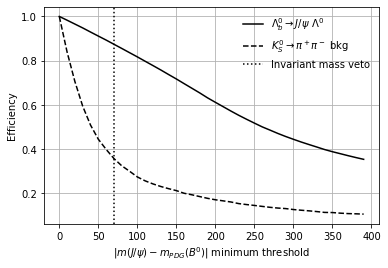

In [21]:
filename = 'phys_veto_efficiencies'

common_params = {
    'color': 'black'
}

lambda_params = {
    'linestyle': '-',
    'label': r'$\Lambda_b^0 \rightarrow J/\psi~\Lambda^0$'
}

b_params = {
    'linestyle': '--',
    'label': r'$K^0_S \rightarrow \pi^+\pi^-$ bkg'
}

axv_params = {
    'linestyle': 'dotted',
    'label': 'Invariant mass veto'
}

plt.plot(thresholds, lambdab_sig_eff, **common_params, **lambda_params)
plt.plot(thresholds, b_sig_eff, **common_params, **b_params)
plt.axvline(current_veto, **common_params, **axv_params)
plt.xlabel("$| m(J/\psi) - m_{PDG}(B^0) |$ minimum threshold")
plt.ylabel("Efficiency")
plt.legend(frameon=False)
plt.grid()

if save_plots:
    plt.savefig(plot_directory + filename + '.pdf', bbox_inches='tight')

plt.show()

In [22]:
for t, s, b in zip(thresholds, lambdab_sig_eff, b_sig_eff):
    print(f'{t}\t{s}\t{1-b}')

0	1.0	0.0
10	0.9829681192849493	0.16111220666535198
20	0.965503748249444	0.2946164464602643
30	0.948059971991103	0.40603431275882473
40	0.9295040777658786	0.4912246105304674
50	0.9112365104209572	0.5553145336225597
60	0.8931542960705166	0.6012620784855058
70	0.8742071010791663	0.6426740287911654
80	0.8553628799736387	0.6754091895089727
90	0.8361685476563143	0.700059159929008
100	0.8171183787791416	0.7258923289292053
110	0.797347392701211	0.7436403076316309
120	0.7778235439492545	0.7574442910668507
130	0.7579907735398304	0.7690790771051075
140	0.7373959963753193	0.7789390652731216
150	0.7171925199769339	0.7878130546243345
160	0.6959387099431584	0.7998422401893117
170	0.6749938215668506	0.8067442319069217
180	0.6539871488590493	0.8148294222046933
190	0.6317447895213774	0.8227174127391047
200	0.6115825026773211	0.8292250049299941
210	0.5918115165993904	0.8341549990140011
220	0.5718757723041437	0.8392821928613685
230	0.5527844138726419	0.8465785841056991
240	0.5348669577395173	0.8509169788

In [23]:
def compute_signal_significance(threshold):
    s = compute_lambdab_efficiency(threshold)
    b = compute_b_efficiency(threshold)
    
    return s/np.sqrt(s+b)

def compute_signal_purity(threshold):
    s = compute_lambdab_efficiency(threshold)
    b = compute_b_efficiency(threshold)
    
    return s/(s+b)

In [24]:
sig_significances = np.array([compute_signal_significance(threshold) for threshold in thresholds])
sig_purities = np.array([compute_signal_purity(threshold) for threshold in thresholds])

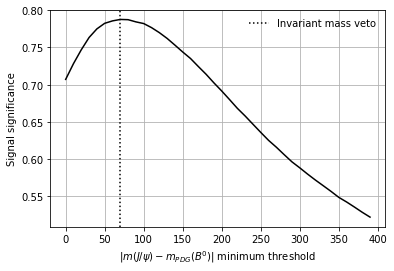

In [25]:
filename = 'phys_veto_significances'

plt.plot(thresholds, sig_significances, color='black')
plt.axvline(current_veto, **common_params, **axv_params)

plt.xlabel("$| m(J/\psi) - m_{PDG}(B^0) |$ minimum threshold")
plt.ylabel("Signal significance")
plt.grid()
plt.legend(frameon=False)
if save_plots:
    plt.savefig(plot_directory + filename + '.pdf', bbox_inches='tight')
plt.show()

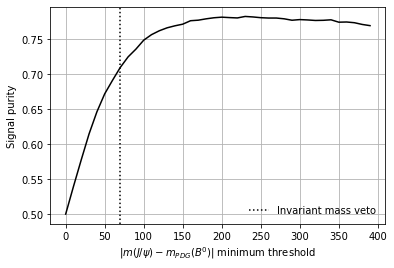

In [26]:
filename = 'phys_veto_purities'

plt.plot(thresholds, sig_purities, color='black')
plt.axvline(current_veto, **common_params, **axv_params)
plt.xlabel("$| m(J/\psi) - m_{PDG}(B^0) |$ minimum threshold")
plt.ylabel("Signal purity")
plt.grid()
plt.legend(frameon=False)
if save_plots:
    plt.savefig(plot_directory + filename + '.pdf', bbox_inches='tight')
plt.show()

In [27]:
bins_mass_Lb = np.linspace(5000, 6200, 31)
bin_mass_Lb_pairs = [(lower, upper) for lower, upper in zip(bins_mass_Lb[:-1], bins_mass_Lb[1:])]
bin_mass_Lb_midpoints = (bins_mass_Lb[1:] + bins_mass_Lb[:-1])/2

In [28]:
def compute_lambdab_efficiency_in_bin(threshold, lower_limit, upper_limit):
    ## Selection is what we keep. I know you'll get it wrong eventually.
    veto_selection = (
        (df_lambdab['DTF_FixJPsiLambda_PIDSubs_status'] != 'Success')
        | (np.abs(df_lambdab['DTF_FixJPsiLambda_PIDSubs_Lb_M'] - b0_pdg_mass) > threshold)
    )
    bin_selection = (
        (df_lambdab['DTF_FixJPsiLambda_Lb_M'] > lower_limit)
        & (df_lambdab['DTF_FixJPsiLambda_Lb_M'] < upper_limit)
    )
    
    return sum(veto_selection & bin_selection)/sum(bin_selection)   

In [29]:
lambdab_eff_per_bin = np.array([compute_lambdab_efficiency_in_bin(70, *pair) for pair in bin_mass_Lb_pairs])

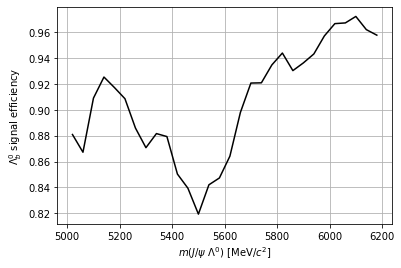

In [30]:
filename = 'phys_veto_sig_efficiencies_per_bin'

plt.plot(bin_mass_Lb_midpoints, lambdab_eff_per_bin, color='black')
plt.xlabel("$m(J/\psi~\Lambda^0)$ [MeV/$c^2$]")
plt.ylabel("$\Lambda_b^0$ signal efficiency")
plt.grid()

if save_plots:
    plt.savefig(plot_directory + filename + '.pdf', bbox_inches='tight')

plt.show()

# Color plots

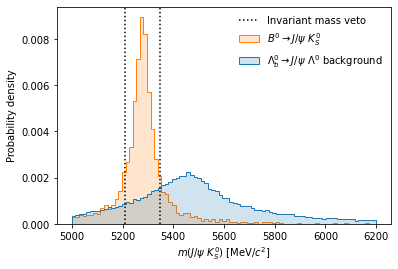

In [31]:
filename = 'phys_bkg_b0_comparison'

hist_params = {
    'density': True,
    'bins': 85,
    'histtype': 'stepfilled',
    'range': (5000,6200),
}

lambda_params = {
     'edgecolor': 'tab:blue',
    'color': mcolors.to_rgba('tab:blue', alpha=0.2),
    'label': r'$\Lambda_b^0 \rightarrow J/\psi~\Lambda^0$ background'
}

b_params = {
    'edgecolor': 'tab:orange',
    'color': mcolors.to_rgba('tab:orange', alpha=0.2),
    'label': r'$B^0 \rightarrow J/\psi~K^0_S$'
}

plt.hist(df_b['DTF_FixJPsiKaon_B0_M'], **hist_params, **b_params)
plt.hist(df_lambdab['DTF_FixJPsiLambda_PIDSubs_Lb_M'], **hist_params, **lambda_params)

plt.axvline(b0_pdg_mass - current_veto, linestyle='dotted', color='black')
plt.axvline(b0_pdg_mass + current_veto, linestyle='dotted', color='black', label='Invariant mass veto')

plt.legend(frameon=False, loc='upper right')
plt.ylabel("Probability density")
plt.xlabel("$m(J/\psi~K^0_S)$ [MeV/$c^2$]")

if save_plots:
    plt.savefig(plot_directory + filename + '_with_threshold.pdf', bbox_inches='tight')
    plt.savefig(plot_directory + filename + '_with_threshold.png', bbox_inches='tight', dpi=150)

plt.show()

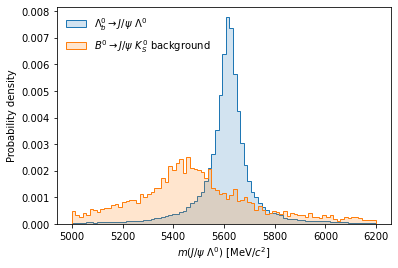

In [32]:
filename = 'phys_bkg_lambdab_comparison'

hist_params = {
    'density': True,
    'bins': 85,
    'histtype': 'stepfilled',
    'range': (5000,6200),
}

lambda_params = {
     'edgecolor': 'tab:blue',
    'color': mcolors.to_rgba('tab:blue', alpha=0.2),
    'label': r'$\Lambda_b^0 \rightarrow J/\psi~\Lambda^0$'
}

b_params = {
    'edgecolor': 'tab:orange',
    'color': mcolors.to_rgba('tab:orange', alpha=0.2),
    'label': r'$B^0 \rightarrow J/\psi~K^0_S$ background'
}


plt.hist(df_lambdab['DTF_FixJPsiLambda_Lb_M'], **hist_params, **lambda_params)
plt.hist(df_b['DTF_FixJPsiKaon_PIDSubs_B0_M'], **hist_params, **b_params)

plt.legend(frameon=False, loc='upper left')
plt.ylabel("Probability density")
plt.xlabel("$m(J/\psi~\Lambda^0)$ [MeV/$c^2$]")

if save_plots:
    plt.savefig(plot_directory + filename + '_in_color' + '.pdf', bbox_inches='tight')
    plt.savefig(plot_directory + filename + '_in_color' + '.png', bbox_inches='tight', dpi=150)

plt.show()

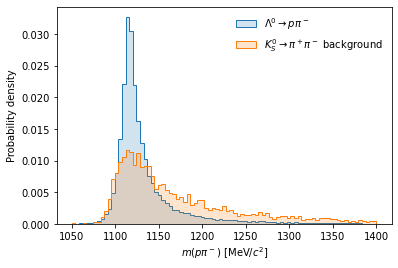

In [33]:
filename = 'phys_bkg_lambda_comparison'


hist_params = {
    'density': True,
    'bins': 85,
    'histtype': 'stepfilled',
    'range': (1050,1400),
}

lambda_params = {
     'edgecolor': 'tab:blue',
    'color': mcolors.to_rgba('tab:blue', alpha=0.2),
    'label': r'$\Lambda^0 \rightarrow p\pi^-$'
}

b_params = {
    'edgecolor': 'tab:orange',
    'color': mcolors.to_rgba('tab:orange', alpha=0.2),
    'label': r'$K^0_S \rightarrow \pi^+\pi^-$ background'
}

plt.hist(df_lambdab['DTF_FixJPsi_L_M'], **hist_params, **lambda_params)
plt.hist(df_b['DTF_FixJPsi_PIDSubs_KS0_M'], **hist_params, **b_params)

plt.legend(frameon=False)
plt.ylabel("Probability density")
plt.xlabel("$m(p\pi^-)$ [MeV/$c^2$]")

if save_plots:
    plt.savefig(plot_directory + filename + '_in_color' + '.pdf', bbox_inches='tight')
    plt.savefig(plot_directory + filename + '_in_color' + '.png', bbox_inches='tight', dpi=150)

plt.show()

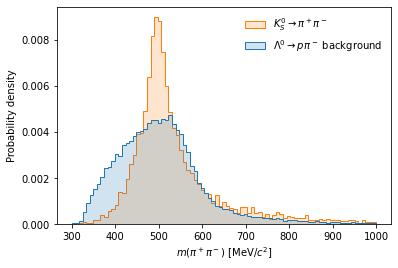

In [34]:
filename = 'phys_bkg_ks_comparison'

hist_params = {
    'density': True,
    'bins': 85,
    'histtype': 'stepfilled',
    'range': (300,1000)
}

lambda_params = {
     'edgecolor': 'tab:blue',
    'color': mcolors.to_rgba('tab:blue', alpha=0.2),
    'label': r'$\Lambda^0 \rightarrow p\pi^-$ background'
}

b_params = {
    'edgecolor': 'tab:orange',
    'color': mcolors.to_rgba('tab:orange', alpha=0.2),
    'label': r'$K^0_S \rightarrow \pi^+\pi^-$'
}

plt.hist(df_b['DTF_FixJPsi_KS0_M'], **hist_params, **b_params)
plt.hist(df_lambdab['DTF_FixJPsi_PIDSubs_L_M'], **hist_params, **lambda_params)

plt.legend(frameon=False)
plt.ylabel("Probability density")
plt.xlabel("$m(\pi^+\pi^-)$ [MeV/$c^2$]")
#plt.ylim(0, 0.013)

if save_plots:
    plt.savefig(plot_directory + filename + '_in_color' + '.pdf', bbox_inches='tight')
    plt.savefig(plot_directory + filename + '_in_color' + '.png', bbox_inches='tight', dpi=150)

plt.show()